In [15]:
import pandas as pd
import matplotlib as pyplot
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
# Reference csv file paths
final_path = "Data/book_to_film_adaptations.csv"

In [17]:
# Import csv files as DataFrames

# Data
final_df = pd.read_csv(final_path, encoding="utf-8")

final_df.head(3)


,Unnamed: 0,index,id,keywords,adult,budget,genres,imdb_id,original_language,original_title,...,title,movieId,imdbId,rating,authors,average_rating,num_pages,ratings_count,publisher,sum_of_ratings
0,0,0,4584,"[{'id': 420, 'name': 'bowling'}, {'id': 818, '...",False,16500000,Drama,tt0114388,en,Sense and Sensibility,...,Sense and Sensibility,17,114388,3.95,Jane Austen/Claudia L. Johnson,4.07,269,768,W. W. Norton & Company,1773
1,1,6,10533,"[{'id': 818, 'name': 'based on novel'}, {'id':...",False,50000000,Drama,tt0114345,en,The Scarlet Letter,...,The Scarlet Letter,191,114345,2.69,Nathaniel Hawthorne/Thomas E. Connolly/Nina Baym,3.40,279,609586,Penguin Books,11030
2,2,18,19101,"[{'id': 818, 'name': 'based on novel'}, {'id':...",False,17000000,Drama,tt0113670,en,A Little Princess,...,A Little Princess,262,113670,3.76,Frances Hodgson Burnett/Nancy Bond,4.20,242,238192,Penguin Books,14769


In [18]:
print(final_df.columns)

Index(['Unnamed: 0', 'index', 'id', 'keywords', 'adult', 'budget', 'genres',
       'imdb_id', 'original_language', 'original_title', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title', 'movieId',
       'imdbId', 'rating', 'authors', 'average_rating', '  num_pages',
       'ratings_count', 'publisher', 'sum_of_ratings'],
      dtype='object')


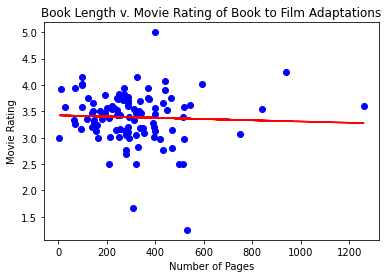

The r-value is: -0.043778432195029734


In [20]:
# Determine x & y values
x_values = final_df['  num_pages']
y_values = final_df['rating']

 # Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot scatter
plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Number of Pages')
plt.ylabel('Movie Rating')
marker_size=20
plt.title('Book Length v. Movie Rating of Book to Film Adaptations')
plt.show()
#H1: r2 != 0 (correlation)
#H0: r2 = 0 (no correlation)

# Print r value
print(f"The r-value is: {rvalue}")
# For further evaluation

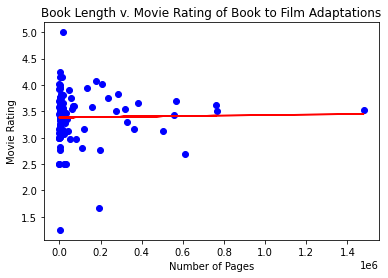

The r-value is: 0.019169007359004328


In [22]:
# Determine x & y values
x_values = final_df['ratings_count']
y_values = final_df['rating']

 # Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot scatter
plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Number of Book Reviews')
plt.ylabel('Movie Rating')
marker_size=20
plt.title('Book Length v. Movie Rating of Book to Film Adaptations')
plt.show()
#H1: r2 != 0 (correlation)
#H0: r2 = 0 (no correlation)

# Print r value
print(f"The r-value is: {rvalue}")
# For further evaluation

In [24]:
def ratingcountdata(loc=0):
    sample = final_df['ratings_count']
    population = final_df['rating']
    
 

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

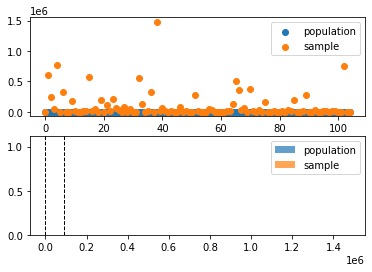

In [25]:
population, sample = moviedata()

In [26]:
# Drop NaN values from sample for t-test
sample.dropna(inplace = True)

# Run one sample t-test where significance value is .05
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=4.448815173110618, pvalue=2.1718128182527057e-05)